In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from pycaret.utils import version
version()
from pycaret.time_series import TSForecastingExperiment
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima.utils import nsdiffs, ndiffs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.seasonal import STL
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pycaret.time_series import *



In [2]:
df_LTC = yf.download(
tickers = ["LTC-USD"],
start = "2020-01-01",
end = "2025-01-02"
)
# Rename columns to remove multi-level indexing
df_LTC.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df_LTC.shape
df_LTC.info()
print('Null Values:',df_LTC.isnull().values.sum())
print(df_LTC.columns)
df_LTC.reset_index(inplace=True)
df_LTC['Date'] = pd.to_datetime(df_LTC['Date'], format='%Y-%m-%d')
df_LTC = df_LTC[['Date', 'Close']]
df_LTC.head()
# Set the Date column as the index
df_LTC.set_index('Date', inplace=True)
print(df_LTC.index)
df_LTC = df_LTC.asfreq('D')  # Resample to daily frequency
# Verify the frequency of the index
print(f"Frequency of the index: {df_LTC.index.freq}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2020-01-01 to 2025-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1828 non-null   float64
 1   High    1828 non-null   float64
 2   Low     1828 non-null   float64
 3   Open    1828 non-null   float64
 4   Volume  1828 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.7 KB
Null Values: 0
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', name='Date', length=1828, freq=None)
Frequency of the ind

In [3]:

exp_LTC = TSForecastingExperiment()
exp_LTC.setup(data=df_LTC, target='Close', fh=365, session_id=123,coverage=0.90)
exp_LTC.check_stats()


,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1828, 1)"
5,Transformed data shape,"(1828, 1)"
6,Transformed train set shape,"(1463, 1)"
7,Transformed test set shape,"(365, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1828.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,96.40221
3,Summary,Statistics,Transformed,Median,,77.248119
4,Summary,Statistics,Transformed,Standard Deviation,,53.47525
5,Summary,Statistics,Transformed,Variance,,2859.602362
6,Summary,Statistics,Transformed,Kurtosis,,3.586442
7,Summary,Statistics,Transformed,Skewness,,1.769907
8,Summary,Statistics,Transformed,# Distinct Values,,1828.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",36972.930407


In [4]:
# Get the complete data used in the experiment
complete_data = exp_LTC.get_config('y')  # Returns the entire target variable (time series)

# Extract training and test data based on 'fh' (forecast horizon)
fh = exp_LTC.get_config('fh')  # Forecast horizon
train_data_LTC = complete_data[:-fh[0]]  # Training data (everything except the last fh steps)
test_data_LTC = complete_data[-fh[0]:]  # Test data (last fh steps)

# Access training and test sets from the configuration
y_train_LTC = exp_LTC.get_config('y_train')
y_test_LTC = exp_LTC.get_config('y_test')

# Print training and testing data
print("Training Data:")
print(y_train_LTC)

print("\nTesting Data:")
print(y_test_LTC)

Training Data:
Date
2020-01-01    42.017719
2020-01-02    39.823013
2020-01-03    42.415573
2020-01-04    43.326607
2020-01-05    43.553207
                ...    
2023-12-29    73.404144
2023-12-30    73.312737
2023-12-31    72.798439
2024-01-01    74.731926
2024-01-02    72.984077
Freq: D, Name: Close, Length: 1463, dtype: float64

Testing Data:
Date
2024-01-03     65.301643
2024-01-04     66.491394
2024-01-05     66.021149
2024-01-06     65.676079
2024-01-07     64.257469
                 ...    
2024-12-28    100.584679
2024-12-29     98.275055
2024-12-30     99.309219
2024-12-31    103.068512
2025-01-01    104.812088
Freq: D, Name: Close, Length: 365, dtype: float64


In [5]:
exp_LTC.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [6]:
#ETS model selection for LTC daily close price data

ses_LTC = exp_LTC.create_model('exp_smooth', trend=None, seasonal=None, sp= None, cross_validation=False )
#holt's linear 
ht_LTC = exp_LTC.create_model('exp_smooth', trend='add', seasonal=None, cross_validation=False)
#holt winters
hw_add_LTC = exp_LTC.create_model('exp_smooth', trend='add', seasonal='add', sp= 365, cross_validation=False)
hw_mult_LTC = exp_LTC.create_model('exp_smooth', trend='add', seasonal='mul', sp=365, cross_validation=False)
hw_damped_LTC = exp_LTC.create_model('exp_smooth', damped_trend='True' , trend='add', seasonal='mul', sp=365, cross_validation=False)
#------------
ets_ANN_LTC = exp_LTC.create_model('ets', error="add", trend=None, seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of SES
ets_AAN_LTC = exp_LTC.create_model('ets', error="add", trend="add", seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of Holt's Linear trend
ets_AAM_LTC = exp_LTC.create_model('ets', error="add", trend="add", seasonal="mul" ,cross_validation=False )




,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.4970,1.2155,11.5556,16.6881,0.1313,0.1414,-0.1367


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5361,1.1222,11.8568,15.4066,0.1435,0.1457,0.0312


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.0459,1.4644,15.7922,20.1054,0.1918,0.2036,-0.6499


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.0394,1.6275,15.7421,22.3440,0.1832,0.1980,-1.0378


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.8068,1.4563,13.9468,19.9936,0.1653,0.1656,-0.6316


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.4970,1.2155,11.5556,16.6881,0.1313,0.1414,-0.1367


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5374,1.1212,11.8672,15.3929,0.1438,0.1458,0.0329


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5294,1.1275,11.8055,15.4798,0.1419,0.1450,0.0219


In [19]:
exp_LTC.compare_models(include=[ ses_LTC, ht_LTC, hw_add_LTC, hw_mult_LTC, hw_damped_LTC, ets_ANN_LTC, ets_AAN_LTC, ets_AAM_LTC,  'ets'], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
0,Exponential Smoothing,1.4970,1.2155,11.5556,16.6881,0.1313,0.1414,-0.1367,0.0600
5,ETS,1.4970,1.2155,11.5556,16.6881,0.1313,0.1414,-0.1367,0.0600
7,ETS,1.5294,1.1275,11.8055,15.4798,0.1419,0.1450,0.0219,0.1700
8,ETS,1.5294,1.1275,11.8055,15.4798,0.1419,0.1450,0.0219,0.1500
1,Exponential Smoothing,1.5361,1.1222,11.8568,15.4066,0.1435,0.1457,0.0312,0.0500
6,ETS,1.5374,1.1212,11.8672,15.3929,0.1438,0.1458,0.0329,0.0600
4,Exponential Smoothing,1.8068,1.4563,13.9468,19.9936,0.1653,0.1656,-0.6316,56.7700
3,Exponential Smoothing,2.0394,1.6275,15.7421,22.3440,0.1832,0.1980,-1.0378,40.3200
2,Exponential Smoothing,2.0459,1.4644,15.7922,20.1054,0.1918,0.2036,-0.6499,8.6100


ExponentialSmoothing()

In [20]:

ets_auto_LTC = exp_LTC.create_model('ets', cross_validation=False)  # Auto ETS selection
tuned_ets_auto_LTC = exp_LTC.tune_model(ets_auto_LTC)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5294,1.1275,11.8055,15.4798,0.1419,0.1450,0.0219


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-01-02'], dtype='period[D]', name='Date')",11.7075,10.2435,50.5974,68.4076,0.2353,0.2831,-1.0277
1,"PeriodIndex(['2022-01-02'], dtype='period[D]', name='Date')",6.6964,4.2665,72.3603,77.7929,1.1362,0.6619,-6.4212
2,"PeriodIndex(['2023-01-02'], dtype='period[D]', name='Date')",1.2892,0.8745,11.5749,13.5717,0.1373,0.1444,-0.2677
Mean,nan,6.5643,5.1282,44.8442,53.2574,0.5030,0.3632,-2.5722
SD,nan,4.2543,3.8731,25.1468,28.3224,0.4496,0.2187,2.7393


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.1s finished


In [21]:
exp_LTC.compare_models(include=[ses_LTC, tuned_ets_auto_LTC], cross_validation=False) # Compare tuned Auto-ETS 

ExponentialSmoothing()

ses_LTC

In [22]:
# Debugging: Check the type and attributes of ses_LTC
print(f"Type of ses_LTC: {type(ses_LTC)}")
print(f"Attributes and methods of ses_LTC: {dir(ses_LTC)}")

Type of ses_LTC: <class 'sktime.forecasting.exp_smoothing.ExponentialSmoothing'>
Attributes and methods of ses_LTC: ['_X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rpow__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_alias_params', '_check_X', '_check_X_y', '_check_fh', '_clone_flags', '_components', '_config', '_config_doc', '_config_dynamic', '_converter_store_y', '_cutoff', '_extract_conf_int', '_fh', '_fit', '_fit_forecaster', '_fitted_forecaster', '_fitted_param_names', '_forecaster', '_get_class_flag', '_get_class_flags', '_get_columns', '_get_fitted_param_names', '_get_fitted_params', '_get_fitted_params_default', '_get_flag', '_get_flags', '_get_init_sign

In [23]:
# Get in-sample predictions (TRYING _fitted_forecaster.fittedvalues for sktime)
in_sample_predictions_ses_LTC = ses_LTC._fitted_forecaster.fittedvalues

# Ensure the index of in-sample predictions matches the training data index
in_sample_predictions_ses_LTC.index = exp_LTC.get_config('y_train').index

# Print in-sample predictions
print("\nIn-sample predictions from ses_LTC (ses_LTC):")
print(in_sample_predictions_ses_LTC)


In-sample predictions from ses_LTC (ses_LTC):
Date
2020-01-01    41.877699
2020-01-02    42.007950
2020-01-03    39.975451
2020-01-04    42.245332
2020-01-05    43.251169
                ...    
2023-12-29    76.648027
2023-12-30    73.630462
2023-12-31    73.334903
2024-01-01    72.835867
2024-01-02    74.599642
Freq: D, Length: 1463, dtype: float64


In [24]:
# Ensure the index of in-sample predictions matches the training data index
in_sample_predictions_ses_LTC.index = exp_LTC.get_config('y_train').index

print("\nIn-sample predictions from Holts Linear model (ses_LTC):")
print(in_sample_predictions_ses_LTC)
if exp_LTC.get_config('y_train').index.equals(in_sample_predictions_ses_LTC.index):
    print("\nIndices are ALIGNED!")
else:
    print("\nIndices are NOT aligned (Warning!)")


In-sample predictions from Holts Linear model (ses_LTC):
Date
2020-01-01    41.877699
2020-01-02    42.007950
2020-01-03    39.975451
2020-01-04    42.245332
2020-01-05    43.251169
                ...    
2023-12-29    76.648027
2023-12-30    73.630462
2023-12-31    73.334903
2024-01-01    72.835867
2024-01-02    74.599642
Freq: D, Length: 1463, dtype: float64

Indices are ALIGNED!


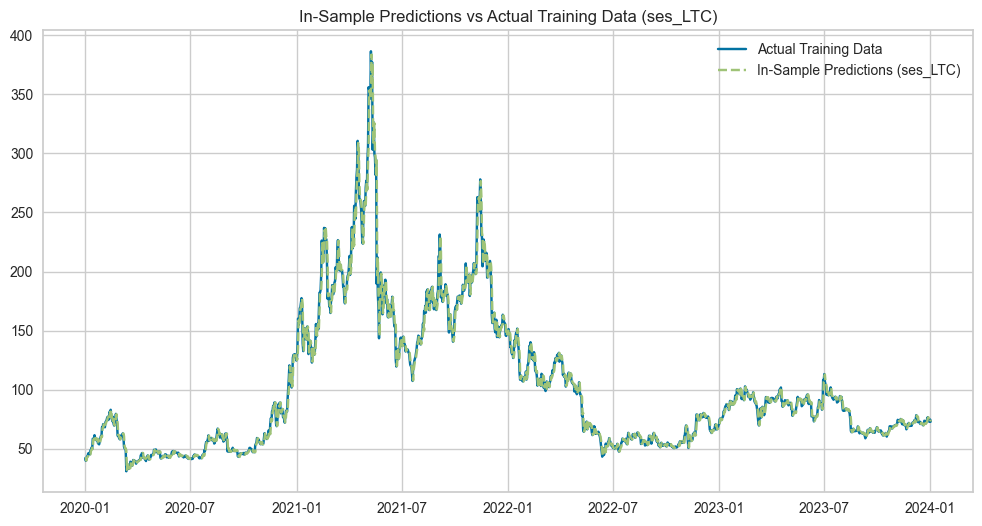

In [25]:
# Plotting in-sample predictions vs actual training data
plt.figure(figsize=(12, 6))

# Convert PeriodIndex to DatetimeIndex for plotting - ACTUAL DATA INDEX
actual_train_index_dt = exp_LTC.get_config('y_train').index.to_timestamp()

# Convert PeriodIndex to DatetimeIndex for plotting - PREDICTION INDEX
prediction_index_dt = in_sample_predictions_ses_LTC.index.to_timestamp()


plt.plot(actual_train_index_dt, exp_LTC.get_config('y_train'), label='Actual Training Data')
plt.plot(prediction_index_dt, in_sample_predictions_ses_LTC, label='In-Sample Predictions (ses_LTC)', linestyle='--')
plt.title('In-Sample Predictions vs Actual Training Data (ses_LTC)')
plt.legend()
plt.show()

In [26]:
# Calculate residuals: actual - predictions
residuals = train_data_LTC - in_sample_predictions_ses_LTC

# Print the first few residuals
print("\nFirst 10 residuals:")
print(residuals.head(10))



First 10 residuals:
Date
2020-01-01    0.140020
2020-01-02   -2.184937
2020-01-03    2.440122
2020-01-04    1.081275
2020-01-05    0.302039
2020-01-06    2.284218
2020-01-07    0.767595
2020-01-08   -0.717263
2020-01-09   -0.487877
2020-01-10    3.477360
Freq: D, dtype: float64


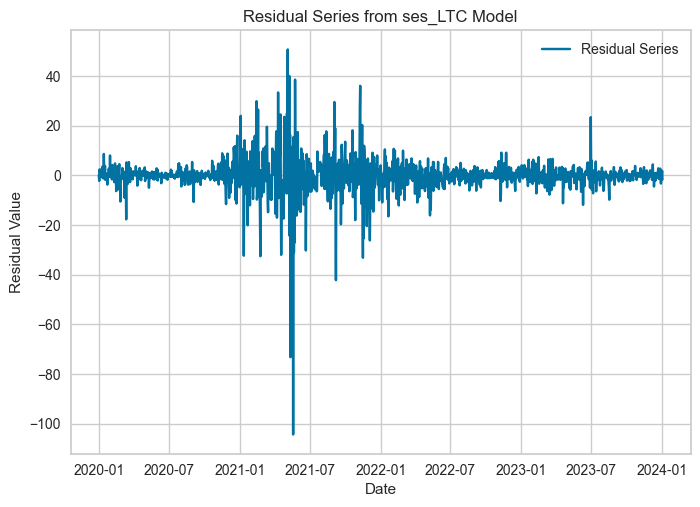

In [28]:
# Convert PeriodIndex to DatetimeIndex for plotting - RESIDUALS INDEX
residuals_index_dt = residuals.index.to_timestamp()

plt.plot(residuals_index_dt, residuals, label='Residual Series')
plt.title('Residual Series from ses_LTC Model')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [29]:
# Step 8: Perform Lag Selection using ACF on Residual Series
exp_LTC.plot_model(plot='acf',  data_kwargs={'nlags': 50}) # Analyze ACF plot to choose lags


In [30]:
# Step 9: Normalize Residual Series (Min-Max Normalization)

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler with feature_range from -1 to 1 (common for ANN)
scaler_residuals = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the residual series and transform it
normalized_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))

# Convert the normalized numpy array back to a pandas Series, with the original index
normalized_residuals = pd.Series(normalized_residuals.flatten(), index=residuals.index)

# Print the first few normalized residuals
print("\nFirst 10 Normalized Residuals:")
print(normalized_residuals.head(10))


First 10 Normalized Residuals:
Date
2020-01-01    0.347261
2020-01-02    0.317263
2020-01-03    0.376939
2020-01-04    0.359406
2020-01-05    0.349352
2020-01-06    0.374927
2020-01-07    0.355359
2020-01-08    0.336200
2020-01-09    0.339160
2020-01-10    0.390322
Freq: D, dtype: float64


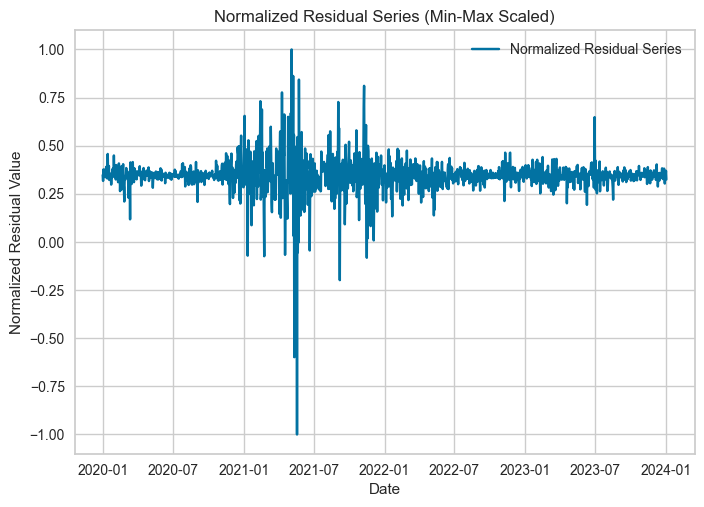

In [31]:
# --- Convert PeriodIndex to DatetimeIndex for plotting - NORMALIZED RESIDUALS INDEX ---
normalized_residuals_index_dt = normalized_residuals.index.to_timestamp()

plt.plot(normalized_residuals_index_dt, normalized_residuals, label='Normalized Residual Series')
plt.title('Normalized Residual Series (Min-Max Scaled)')
plt.xlabel('Date')
plt.ylabel('Normalized Residual Value')
plt.legend()
plt.show()


In [32]:
# --- Fill any remaining NaNs with 0 (Brute-Force NaN Handling - Before Lagging) ---
normalized_residuals.fillna(0, inplace=True) # FILL NANS WITH 0 HERE - NEW


In [33]:
# Step 10a: Prepare Data for ANN - Create Lagged Features and Target

def create_lagged_features(series, lags):
    """
    Creates lagged features from a time series.
    """
    lagged_features = {}
    for lag in lags:
        lagged_features[f'lag_{lag}'] = series.shift(lag)
    lagged_df = pd.DataFrame(lagged_features)
    return lagged_df # NO dropna() HERE ANYMORE

lags_to_use = [1, 7, 30]  # Lags based on ACF analysis

lagged_residual_features = create_lagged_features(normalized_residuals, lags_to_use)
# --- Drop NaNs RIGHT AFTER FEATURE CREATION, BEFORE SPLITTING ---
lagged_residual_features.dropna(inplace=True) # Drop NaNs NOW 

residual_target = normalized_residuals.reindex(lagged_residual_features.index)

X_train_ann = lagged_residual_features
y_train_ann = residual_target

X_train_ann_np = X_train_ann.values
y_train_ann_np = y_train_ann.values

In [34]:
# --- Data Splitting for Validation ---
from sklearn.model_selection import train_test_split
X_train_ann_train, X_val_ann, y_train_ann_train, y_val_ann = train_test_split(
    X_train_ann, y_train_ann, test_size=0.2, shuffle=False
)

X_val_ann_np = X_val_ann.values # Convert VALIDATION sets to numpy arrays 
y_val_ann_np = y_val_ann.values # Convert VALIDATION sets to numpy arrays
X_train_ann_train_np = X_train_ann_train.values # Convert TRAIN sets to numpy arrays 
y_train_ann_train_np = y_train_ann_train.values # Convert TRAIN sets to numpy arrays 

# --- Ensure Data Types are float32 (Defensive Data Handling) ---
X_train_ann_train_np = X_train_ann_train_np.astype(np.float32) # Ensure float32 data type - NEW
X_val_ann_np = X_val_ann_np.astype(np.float32) # Ensure float32 data type - NEW
y_train_ann_train_np = y_train_ann_train_np.astype(np.float32) # Ensure float32 data type - NEW
y_val_ann_np = y_val_ann_np.astype(np.float32) # Ensure float32 data type - NEW

In [35]:
# --- Manual Tuning Loop Code Block ---

neuron_options = [25, 50, 100]
epochs_options = [30, 50, 70]
batch_size_options = [16, 32]

best_rmse = float('inf') 
best_params = None

for neurons in neuron_options:
    for epochs in epochs_options:
        for batch_size in batch_size_options:
            print(f"Trying: Neurons={neurons}, Epochs={epochs}, Batch Size={batch_size}")
            
            # Build ANN model (same as before, but using current hyperparameter values)
            ann_model = Sequential()
            ann_model.add(Dense(neurons, activation='relu', input_shape=(X_train_ann_train_np.shape[1],))) # Use _train_np shape
            ann_model.add(Dense(25, activation='relu'))
            ann_model.add(Dense(1))
            ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # Use legacy Adam optimizer - NEW
            
            # Train model (using *smaller* training set: X_train_ann_train_np, y_train_ann_train_np)
            ann_model.fit(X_train_ann_train_np, y_train_ann_train_np, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # --- NaN Check 3: Right Before Prediction (Defensive Check) ---
            print(f"NaNs in X_val_ann_np BEFORE prediction: {np.isnan(X_val_ann_np).any()}") # ADDED CHECK AGAIN - RIGHT BEFORE PREDICT

            # Evaluate on VALIDATION set (using X_val_ann_np, y_val_ann_np - NO NaNs now)
            validation_predictions = ann_model.predict(X_val_ann_np).flatten() 
            rmse = np.sqrt(mean_squared_error(y_val_ann_np, validation_predictions)) 

            print(f"  Validation RMSE: {rmse:.4f}")

            if rmse < best_rmse: 
                best_rmse = rmse
                best_params = {'neurons': neurons, 'epochs': epochs, 'batch_size': batch_size}

print("\nBest Hyperparameters found (based on Validation RMSE):")
print(best_params)
print(f"Best Validation RMSE: {best_rmse:.4f}")

Trying: Neurons=25, Epochs=30, Batch Size=16


2025-02-23 00:57:48.959367: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 1s 24ms/step
  Validation RMSE: 0.2767
Trying: Neurons=25, Epochs=30, Batch Size=32


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 9ms/step


  Validation RMSE: 0.2711
Trying: Neurons=25, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 2ms/step


  Validation RMSE: 0.4229
Trying: Neurons=25, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 2ms/step


  Validation RMSE: 0.2965
Trying: Neurons=25, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 3ms/step


  Validation RMSE: 0.3152
Trying: Neurons=25, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 623us/step


  Validation RMSE: 0.4351
Trying: Neurons=50, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 3ms/step


  Validation RMSE: 0.4061
Trying: Neurons=50, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 7ms/step
  Validation RMSE: 0.3112
Trying: Neurons=50, Epochs=50, Batch Size=16


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 1s 33ms/step


  Validation RMSE: 0.3313
Trying: Neurons=50, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 3ms/step
  Validation RMSE: 0.4040
Trying: Neurons=50, Epochs=70, Batch Size=16


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 6ms/step
  Validation RMSE: 0.3909
Trying: Neurons=50, Epochs=70, Batch Size=32


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 4ms/step


  Validation RMSE: 0.4422
Trying: Neurons=100, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 3ms/step


  Validation RMSE: 0.3838
Trying: Neurons=100, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 3ms/step


  Validation RMSE: 0.2670
Trying: Neurons=100, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 2ms/step
  Validation RMSE: 0.4314
Trying: Neurons=100, Epochs=50, Batch Size=32


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 1ms/step


  Validation RMSE: 0.3926
Trying: Neurons=100, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 1ms/step


  Validation RMSE: 0.4567
Trying: Neurons=100, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 4ms/step
  Validation RMSE: 0.5122

Best Hyperparameters found (based on Validation RMSE):
{'neurons': 100, 'epochs': 30, 'batch_size': 32}
Best Validation RMSE: 0.2670


In [36]:
# Best Hyperparameters from Tuning (replace with your best values if different)
best_neurons = 100
best_epochs = 30
best_batch_size = 32

# 1. Build the Final ANN Model with Best Hyperparameters
final_ann_model = Sequential()
final_ann_model.add(Dense(best_neurons, activation='relu', input_shape=(X_train_ann_np.shape[1],))) # Best neurons for layer 1
final_ann_model.add(Dense(25, activation='relu')) # You can keep layer 2 as before
final_ann_model.add(Dense(1))

# 2. Compile the Final ANN Model
optimizer = Adam(learning_rate=0.001) # You can keep learning rate as before, or tune it too
final_ann_model.compile(optimizer=optimizer, loss='mse')

# 3. Train the Final ANN Model (on FULL training data: X_train_ann_np, y_train_ann_np)
final_ann_model.fit(X_train_ann_np, y_train_ann_np, epochs=best_epochs, batch_size=best_batch_size, verbose=0) # Use best epochs, batch_size

# 4. Print Model Summary of the Final Model
final_ann_model.summary()

print("\nFinal ANN Model Retraining Complete (with Best Hyperparameters)!")

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 100)               400       
                                                                 
 dense_55 (Dense)            (None, 25)                2525      
                                                                 
 dense_56 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,951
Trainable params: 2,951
Non-trainable params: 0
_________________________________________________________________

Final ANN Model Retraining Complete (with Best Hyperparameters)!



First 10 De-normalized In-Sample ANN Residual Predictions:
Date
2020-01-31   -0.147097
2020-02-01   -0.671047
2020-02-02   -0.650471
2020-02-03   -0.881857
2020-02-04   -0.868564
2020-02-05   -0.533373
2020-02-06   -1.273482
2020-02-07   -0.673627
2020-02-08   -0.941802
2020-02-09   -0.333904
Freq: D, dtype: float32


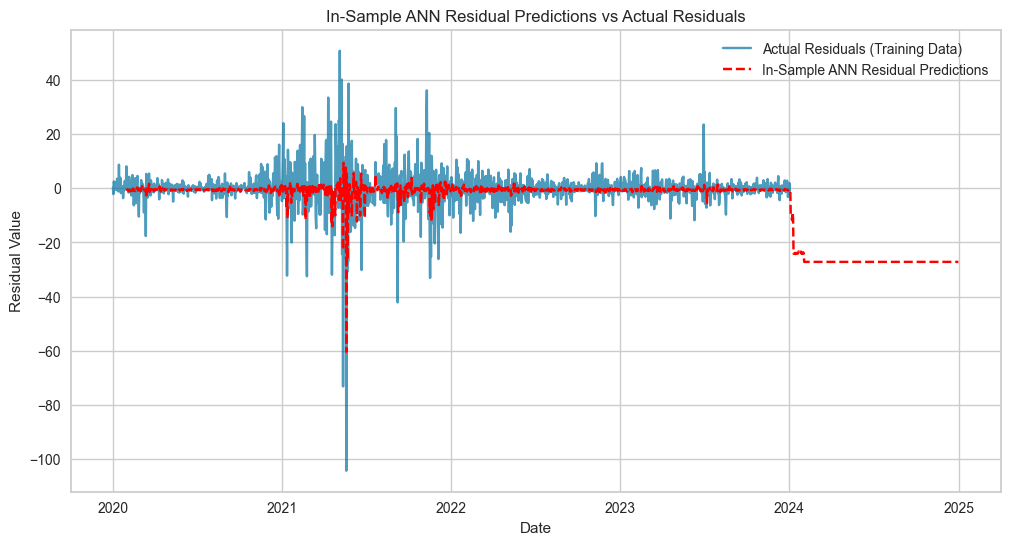

In [37]:
# Step 10 (Continued): Obtain In-Sample ANN Residual Predictions

# Use the trained final_ann_model to predict in-sample residuals

# 1. Prepare Input Features (already have X_train_ann_np from Step 10a)
#    X_train_ann_np (numpy array of lagged features for training data) is ready to use.

# 2. Generate In-Sample ANN Residual Predictions (Normalized)
ann_predictions_insample_normalized = final_ann_model.predict(X_train_ann_np, verbose=0).flatten()
ann_predictions_insample_normalized = pd.Series(ann_predictions_insample_normalized, index=X_train_ann.index)

# 3. De-normalize ANN Predictions (back to original residual scale)
ann_predictions_insample_denormalized = scaler_residuals.inverse_transform(ann_predictions_insample_normalized.values.reshape(-1, 1)).flatten()
ann_predictions_insample_denormalized = pd.Series(ann_predictions_insample_denormalized, index=ann_predictions_insample_normalized.index)

# 4. Print a sample of de-normalized in-sample ANN predictions
print("\nFirst 10 De-normalized In-Sample ANN Residual Predictions:")
print(ann_predictions_insample_denormalized.head(10))

# 5. Plotting In-Sample ANN Residual Predictions vs Actual Residuals (Optional)
plt.figure(figsize=(12, 6))
plt.plot(residuals.index.to_timestamp(), residuals, label='Actual Residuals (Training Data)', alpha=0.7) # Actual residuals
plt.plot(ann_predictions_insample_denormalized.index.to_timestamp(), ann_predictions_insample_denormalized, label='In-Sample ANN Residual Predictions', linestyle='--', color='red') # ANN predictions
plt.title('In-Sample ANN Residual Predictions vs Actual Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()


First 10 De-normalized Hold-out ANN Residual Predictions:
Date
2024-01-03   -27.203918
2024-01-04   -27.607182
2024-01-05   -27.985199
2024-01-06   -28.333364
2024-01-07   -28.651417
2024-01-08   -28.940432
2024-01-09   -29.197723
2024-01-10   -29.876575
2024-01-11   -30.854441
2024-01-12   -32.037144
Freq: D, dtype: float32


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,1.4970,1.2155,11.5556,16.6881,0.1313,0.1414,-0.1367


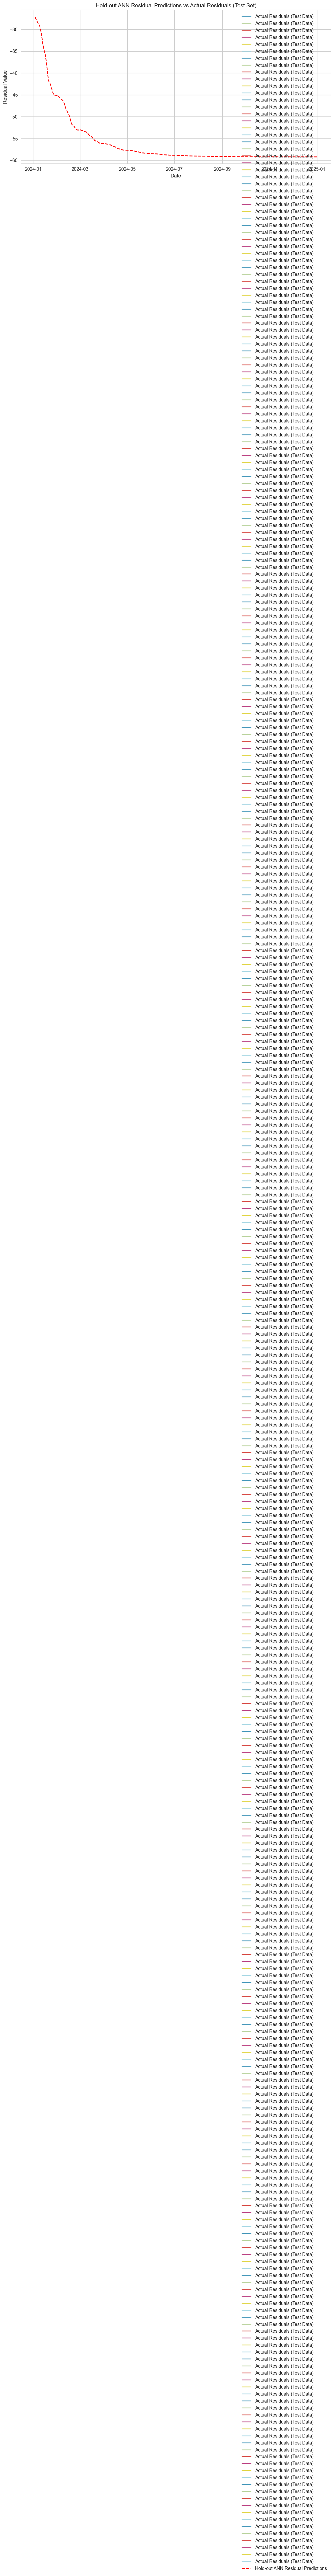

In [38]:
# Step 10 (Continued): Obtain Hold-out (Test Set) ANN Residual Predictions

# 1. Prepare for Iterative Forecast - Get last training residuals as initial history
last_train_residuals_normalized = normalized_residuals.tail(max(lags_to_use)).values # Last 'max_lag' residuals from training set (normalized)
ann_predictions_holdout_normalized = [] # List to store forecasted normalized residuals for hold-out period
current_residuals_history = list(last_train_residuals_normalized) # Initialize history with last training residuals

# 2. Iterative (Recursive) Forecast Loop - for each step in forecast horizon (fh)
forecast_horizon = len(exp_LTC.get_config('y_test')) # Length of forecast horizon (test set)

for _ in range(forecast_horizon): # Iterate for each step in forecast horizon
    
    # a. Create feature vector from current residual history
    feature_vector = np.array([current_residuals_history[-lag] for lag in lags_to_use]).reshape(1, -1) # Get lagged residuals from history
    
    # b. Predict next residual (normalized) using trained ANN model
    next_residual_normalized = final_ann_model.predict(feature_vector, verbose=0).flatten()[0] # Predict 1 step ahead
    ann_predictions_holdout_normalized.append(next_residual_normalized) # Append prediction to forecast list
    
    # c. Update residual history for next iteration - append predicted residual and remove oldest
    current_residuals_history.append(next_residual_normalized) # Append PREDICTED residual to history
    current_residuals_history.pop(0) # Remove the oldest residual from history (to keep history length constant)

# 3. Convert ANN Hold-out Predictions to Pandas Series with Test Set Index
ann_predictions_holdout_normalized = pd.Series(ann_predictions_holdout_normalized, index=exp_LTC.get_config('y_test').index)

# 4. De-normalize ANN Hold-out Predictions (back to original residual scale)
ann_predictions_holdout_denormalized = scaler_residuals.inverse_transform(np.array(ann_predictions_holdout_normalized).reshape(-1, 1)).flatten()
ann_predictions_holdout_denormalized = pd.Series(ann_predictions_holdout_denormalized, index=ann_predictions_holdout_normalized.index)

# 5. Print sample of de-normalized hold-out ANN residual predictions
print("\nFirst 10 De-normalized Hold-out ANN Residual Predictions:")
print(ann_predictions_holdout_denormalized.head(10))

# --- Step: Obtain ETS Hold-out Predictions (for plotting) ---
ets_predictions_holdout = exp_LTC.predict_model(ses_LTC)

# Ensure the index of ETS hold-out predictions is a DatetimeIndex for plotting
if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()

# 6. Plotting Hold-out ANN Residual Predictions vs Actual Residuals (Test Set) - Optional
plt.figure(figsize=(12, 6))
plt.plot(exp_LTC.get_config('y_test').index.to_timestamp(), exp_LTC.get_config('y_test') - ets_predictions_holdout, label='Actual Residuals (Test Data)', alpha=0.7) # Actual test residuals (calculated)
plt.plot(ann_predictions_holdout_denormalized.index.to_timestamp(), ann_predictions_holdout_denormalized, label='Hold-out ANN Residual Predictions', linestyle='--', color='red') # ANN holdout predictions
plt.title('Hold-out ANN Residual Predictions vs Actual Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [39]:
# --- Insert this code block to replace the original summary statistics printing ---

# Print summary statistics (min, max, mean, std) for actual test residuals
y_test_LTC_datetime_index = y_test_LTC.copy() # Create a copy to avoid modifying original y_test_LTC
y_test_LTC_datetime_index.index = y_test_LTC_datetime_index.index.to_timestamp() # Convert PeriodIndex to DatetimeIndex

actual_test_residuals_series = y_test_LTC_datetime_index - ets_predictions_holdout['y_pred'] # Use y_test_LTC_datetime_index here

print("\nSummary Statistics - Actual Test Set Residuals (DatetimeIndex):")
print(actual_test_residuals_series.describe())

# Print summary statistics for de-normalized ANN hold-out predictions (no change needed here)
print("\nSummary Statistics - De-normalized ANN Hold-out Predictions:")
print(ann_predictions_holdout_denormalized.describe())


Summary Statistics - Actual Test Set Residuals (DatetimeIndex):
count    365.000000
mean       5.787365
std       15.673975
min      -17.112890
25%       -5.660818
50%        0.032923
75%       12.011202
max       63.141908
dtype: float64

Summary Statistics - De-normalized ANN Hold-out Predictions:
count    365.000000
mean     -55.894360
std        6.565071
min      -59.207840
25%      -59.168468
50%      -58.847179
75%      -56.206169
max      -27.203918
dtype: float64


In [40]:
print("\nHead of ets_predictions_holdout DataFrame:")
print(ets_predictions_holdout.head())
print("\nInfo of ets_predictions_holdout DataFrame:")
ets_predictions_holdout.info()


Head of ets_predictions_holdout DataFrame:
             y_pred
2024-01-03  73.0968
2024-01-04  73.0968
2024-01-05  73.0968
2024-01-06  73.0968
2024-01-07  73.0968

Info of ets_predictions_holdout DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [41]:
print("\nHead of y_test_LTC DataFrame:")
print(y_test_LTC.head())
print("\nInfo of y_test_LTC DataFrame:")
y_test_LTC.info()



Head of y_test_LTC DataFrame:
Date
2024-01-03    65.301643
2024-01-04    66.491394
2024-01-05    66.021149
2024-01-06    65.676079
2024-01-07    64.257469
Freq: D, Name: Close, dtype: float64

Info of y_test_LTC DataFrame:
<class 'pandas.core.series.Series'>
PeriodIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [42]:
# Re-run Step 5b: Obtain Hold-out (Test Set) Predictions from Best ETS Model
ets_predictions_holdout = exp_LTC.predict_model(ses_LTC) 

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,1.4970,1.2155,11.5556,16.6881,0.1313,0.1414,-0.1367


In [43]:
# Calculate residuals: actual - predictions
residuals = train_data_LTC - in_sample_predictions_ses_LTC


In [44]:
# --- Step 12: Combine ETS and ANN Predictions for Final Hybrid Forecasts ---

# Get ETS hold-out predictions (if you haven't already calculated them)
ets_predictions_holdout = exp_LTC.predict_model(ses_LTC)

# Combine ETS predictions and ANN residual predictions for final hybrid hold-out forecasts
final_predictions_holdout_hybrid = ets_predictions_holdout['y_pred'] + ann_predictions_holdout_denormalized

# Print the first few final hybrid hold-out forecasts
print("\nFirst 10 Final Hybrid Hold-out Forecasts:")
print(final_predictions_holdout_hybrid.head(10))

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,1.4970,1.2155,11.5556,16.6881,0.1313,0.1414,-0.1367



First 10 Final Hybrid Hold-out Forecasts:
2024-01-03    45.892882
2024-01-04    45.489618
2024-01-05    45.111601
2024-01-06    44.763436
2024-01-07    44.445383
2024-01-08    44.156368
2024-01-09    43.899077
2024-01-10    43.220225
2024-01-11    42.242359
2024-01-12    41.059656
Freq: D, dtype: float64


In [45]:
def ts_metrics(y, y_hat):
    """
    Calculate and display time series evaluation metrics.
    
    Parameters:
    y (array-like): Actual values
    y_hat (array-like): Predicted values
    
    Returns:
    dict: A dictionary containing all calculated metrics
    """
    # Calculate metrics
    mae = mean_absolute_error(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    r2 = r2_score(y, y_hat)
    
    
    # Store metrics in a dictionary
    metrics = {
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
    }
    
    # Print metrics with descriptions
    print("Time Series Model Evaluation Metrics:")
    print("-" * 40)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return 

In [46]:
# --- Step 13: Evaluate Hybrid Model Performance on Hold-out Set ---
print("\n--- Hybrid Model Evaluation Metrics (Hold-out Set) ---")
ts_metrics(exp_LTC.get_config('y_test'), final_predictions_holdout_hybrid) # Use ts_metrics function to evaluate




--- Hybrid Model Evaluation Metrics (Hold-out Set) ---
Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 61.6817
Mean Absolute Percentage Error (MAPE): 77.2089%
Root Mean Squared Error (RMSE): 64.2749
R-squared (R²): -15.8623
